# Tensorflow Practice

In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
# check which tensorflow version
print(tf.__version__)

2.6.0


## Generate Data

In [4]:
observations = 1000

# generate xs and zs
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(low=-10, high=10, size=(observations,1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations,1))

# generated algorithm
generated_targets = 2*xs - 3*zs + 5 + noise

# save as numpy file since tensorflow prefers tensors as opposed to other files
np.savez("tf_intro", inputs=generated_inputs, targets=generated_targets)

In [5]:
training_data = np.load('tf_intro.npz')

In [9]:
training_data

## Solving with Tensorflow
**Build Model**

In [6]:
# input size is for each variable, xs and zs

# how many fields I'll use for my model
input_size = 2

# the prediction
output_size = 1

In [7]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size) # same as outputs = np.dot(inputs,weights) + bias
                            ])

# add optimizer, sgd for stochastic gradient descent
# add L2 norm loss, aka least sum of squared errors
model.compile(optimizer='sgd', loss='mean_squared_error')


# now fit the model
# epoch = number of iterations
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 1s - loss: 26.5486
Epoch 2/100
32/32 - 0s - loss: 4.7034
Epoch 3/100
32/32 - 0s - loss: 1.4925
Epoch 4/100
32/32 - 0s - loss: 0.6567
Epoch 5/100
32/32 - 0s - loss: 0.4320
Epoch 6/100
32/32 - 0s - loss: 0.3673
Epoch 7/100
32/32 - 0s - loss: 0.3431
Epoch 8/100
32/32 - 0s - loss: 0.3409
Epoch 9/100
32/32 - 0s - loss: 0.3437
Epoch 10/100
32/32 - 0s - loss: 0.3474
Epoch 11/100
32/32 - 0s - loss: 0.3406
Epoch 12/100
32/32 - 0s - loss: 0.3406
Epoch 13/100
32/32 - 0s - loss: 0.3395
Epoch 14/100
32/32 - 0s - loss: 0.3425
Epoch 15/100
32/32 - 0s - loss: 0.3382
Epoch 16/100
32/32 - 0s - loss: 0.3492
Epoch 17/100
32/32 - 0s - loss: 0.3479
Epoch 18/100
32/32 - 0s - loss: 0.3402
Epoch 19/100
32/32 - 0s - loss: 0.3481
Epoch 20/100
32/32 - 0s - loss: 0.3473
Epoch 21/100
32/32 - 0s - loss: 0.3470
Epoch 22/100
32/32 - 0s - loss: 0.3489
Epoch 23/100
32/32 - 0s - loss: 0.3435
Epoch 24/100
32/32 - 0s - loss: 0.3427
Epoch 25/100
32/32 - 0s - loss: 0.3412
Epoch 26/100
32/32 - 0s - loss: 0

## Extracts Weights and Bias

In [10]:
# print out weights and bias
model.layers[0].get_weights()

[array([[ 1.9869981],
        [-3.0124714]], dtype=float32), array([5.001249], dtype=float32)]

In [11]:
weights = model.layers[0].get_weights()[0]

weights

array([[ 1.9869981],
       [-3.0124714]], dtype=float32)

In [12]:
bias = model.layers[0].get_weights()[1]

bias

array([5.001249], dtype=float32)

## Extract the Outputs (Make Predictions)

In [25]:
# output values compared to target to evaluate loss function
model.predict_on_batch(training_data['inputs']).round(1)

array([[  8.6],
       [-14.6],
       [-12.8],
       [ -4.9],
       [  2.6],
       [-20.4],
       [ -8. ],
       [ -5.9],
       [ -4.9],
       [ 17.5],
       [ 17.1],
       [-10.4],
       [ -7.2],
       [ -7.9],
       [-22.7],
       [ 37.7],
       [  4.1],
       [ 28. ],
       [ -7.4],
       [ 41.1],
       [  8. ],
       [-40. ],
       [  3.1],
       [-13.8],
       [  5.9],
       [ -1.9],
       [  5.6],
       [ 26.2],
       [ 38.4],
       [ -8.8],
       [ 12. ],
       [ -1.5],
       [ 12.2],
       [  9.7],
       [-15.6],
       [-20.2],
       [-20.6],
       [ -4.4],
       [-37.3],
       [  2.7],
       [-17.1],
       [  8.8],
       [-31. ],
       [-32.9],
       [-35.7],
       [ 40.2],
       [ 11.5],
       [ -7.9],
       [-14.7],
       [ 14.8],
       [ 14.1],
       [ -2.9],
       [-20.2],
       [-25.1],
       [-10.6],
       [ 12.5],
       [-13.3],
       [ 17. ],
       [ -0.6],
       [  2.9],
       [ 38.6],
       [-22.4],
       [

In [19]:
# compare manually
training_data['targets'].round()

array([[ 10.],
       [-14.],
       [-12.],
       [ -5.],
       [  3.],
       [-21.],
       [ -8.],
       [ -7.],
       [ -4.],
       [ 18.],
       [ 17.],
       [-10.],
       [ -8.],
       [ -7.],
       [-23.],
       [ 38.],
       [  5.],
       [ 27.],
       [ -8.],
       [ 40.],
       [  8.],
       [-40.],
       [  4.],
       [-14.],
       [  7.],
       [ -3.],
       [  6.],
       [ 25.],
       [ 38.],
       [-10.],
       [ 11.],
       [ -1.],
       [ 11.],
       [ 10.],
       [-16.],
       [-21.],
       [-20.],
       [ -5.],
       [-37.],
       [  2.],
       [-17.],
       [  8.],
       [-31.],
       [-33.],
       [-37.],
       [ 40.],
       [ 12.],
       [ -9.],
       [-15.],
       [ 14.],
       [ 13.],
       [ -3.],
       [-20.],
       [-26.],
       [-11.],
       [ 13.],
       [-14.],
       [ 17.],
       [ -0.],
       [  2.],
       [ 38.],
       [-22.],
       [ 17.],
       [  4.],
       [  7.],
       [ 11.],
       [ 1

## Plotting the Data

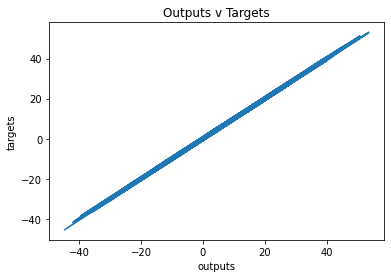

In [27]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.title('Outputs v Targets')
plt.show()

## Tuning Hyperparameters

In [28]:
# input size is for each variable, xs and zs

# how many fields I'll use for my model
input_size = 2

# the prediction
output_size = 1

# make our model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size, # same as outputs = np.dot(inputs,weights) + bias
                                                   kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                   bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                   ), 
                            ])

# try out a custom optimizer
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# add optimizer, sgd for stochastic gradient descent
# add L2 norm loss, aka least sum of squared errors
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')


# now fit the model
# epoch = number of iterations
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 27.6312
Epoch 2/100
32/32 - 0s - loss: 1.0875
Epoch 3/100
32/32 - 0s - loss: 0.4181
Epoch 4/100
32/32 - 0s - loss: 0.3811
Epoch 5/100
32/32 - 0s - loss: 0.3656
Epoch 6/100
32/32 - 0s - loss: 0.4007
Epoch 7/100
32/32 - 0s - loss: 0.3825
Epoch 8/100
32/32 - 0s - loss: 0.3739
Epoch 9/100
32/32 - 0s - loss: 0.4174
Epoch 10/100
32/32 - 0s - loss: 0.3830
Epoch 11/100
32/32 - 0s - loss: 0.3787
Epoch 12/100
32/32 - 0s - loss: 0.3840
Epoch 13/100
32/32 - 0s - loss: 0.3878
Epoch 14/100
32/32 - 0s - loss: 0.3856
Epoch 15/100
32/32 - 0s - loss: 0.3497
Epoch 16/100
32/32 - 0s - loss: 0.3549
Epoch 17/100
32/32 - 0s - loss: 0.3615
Epoch 18/100
32/32 - 0s - loss: 0.3728
Epoch 19/100
32/32 - 0s - loss: 0.4523
Epoch 20/100
32/32 - 0s - loss: 0.3869
Epoch 21/100
32/32 - 0s - loss: 0.3807
Epoch 22/100
32/32 - 0s - loss: 0.3740
Epoch 23/100
32/32 - 0s - loss: 0.3627
Epoch 24/100
32/32 - 0s - loss: 0.3928
Epoch 25/100
32/32 - 0s - loss: 0.3678
Epoch 26/100
32/32 - 0s - loss: 0

In [31]:
weights = model.layers[0].get_weights()[0]

bias = model.layers[0].get_weights()[1]

print('Weights are:\n', weights)
print('Bias is:\n', bias)

Weights are:
 [[ 2.0023496]
 [-3.0766392]]
Bias is:
 [4.9903097]


In [36]:
# create a dataframe for targets v predicted
model_data = pd.DataFrame(model.predict_on_batch(training_data['inputs']).round(1), columns=['predicted'])

In [37]:
model_data.head()

,predicted
0,8.4
1,-15.0
2,-13.1
3,-5.2
4,2.4


In [38]:
model_data['actual'] = pd.DataFrame(training_data['targets'].round())

In [39]:
model_data.head()

,predicted,actual
0,8.4,10.0
1,-15.0,-14.0
2,-13.1,-12.0
3,-5.2,-5.0
4,2.4,3.0


In [40]:
model_data.shape

(1000, 2)

In [42]:
# plt.scatter(x='predicted', y='actual')
# plt.show()